<a href="https://colab.research.google.com/github/nurhidayahputeri/Signal-and-Iot-Data-Processing/blob/main/Data%20Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Download dataset from:
https://www.kaggle.com/datasets/imsparsh/singlechestmounted-accelerometer
2. Please extract that dataset and choose one dataset out of 10 available dataset. You may use data format either in CSV or XLS / XLSX. Column A in dataset is index of data, you may select column B or C or D (X,Y, Z axis of accelerometer) as your raw data to be filtered.
3. Make a program, in Python or C or Matlab or Mathematica
to perform signal / data filtering using:
   * LFP
   * MVP
4. Please answer the following questions.
   * Plot the raw data and compared to LPF and MVA Filter.
   * Which frequency cut-off (fc) do you use for LPF? How do you determine that fc ? (please provide a plot of filtered data regarding the frequency cutt-off you used)
   * What is the windows size you used in MVA ? (please select 3 different windows size, and then plot and compared the results). Which windows size does give smooth data plot? Why?
   * Please attach your listing program for LPF and MVA.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [ ]:
data = pd.read_csv ('8.csv')
raw_data = data ['B']

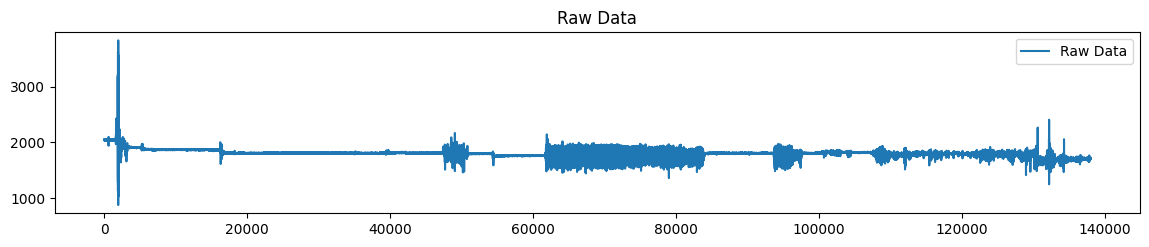

In [ ]:
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(raw_data, label='Raw Data')
plt.title('Raw Data')
plt.legend()

**LPF**

In [ ]:
#LPF
fc = 0.02
fs = 100
order = 5

def lpf(raw_data, fc, fs, order):
    nyquist = 0.5 * fs
    normal_cutoff = fc / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, raw_data)
    return y

lpf_filtered_data = lpf(raw_data, fc, fs, order)

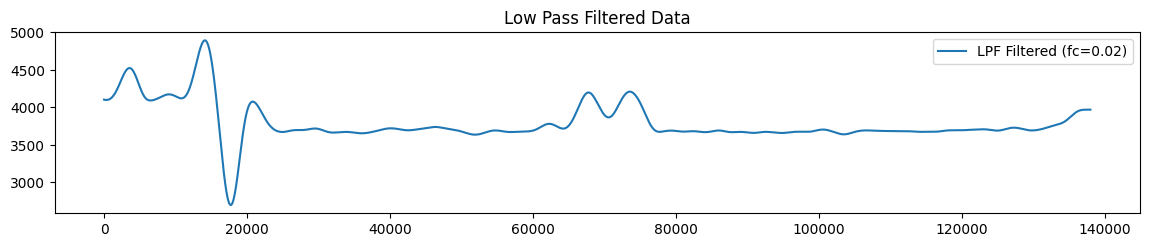

In [ ]:
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 2)
plt.plot(lpf_filtered_data, label=f'LPF Filtered (fc={fc})')
plt.title('Low Pass Filtered Data')
plt.legend()
plt.show();

**MVA**

In [ ]:
#MVA
def mva(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='same')

window_sizes = [5, 10, 20]

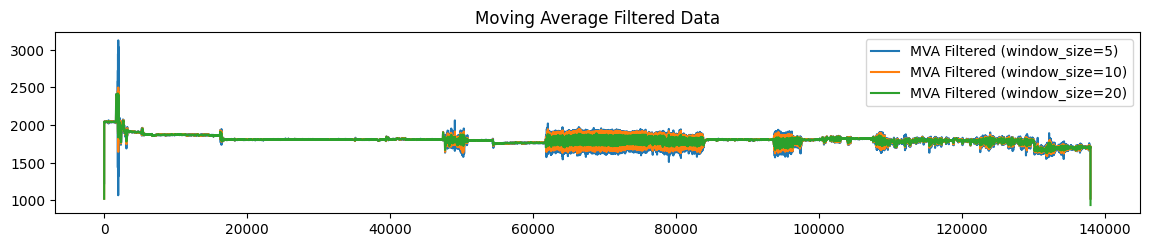

In [ ]:
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 3)
for window in window_sizes:
    mva_filtered_data = mva(raw_data, window)
    plt.plot(mva_filtered_data, label=f'MVA Filtered (window_size={window})')

plt.title('Moving Average Filtered Data')
plt.legend()
plt.show();